In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置英文字体为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
def data_prepare(file):
    df = pd.read_csv(file, encoding='gbk').drop("单品编码", axis=1)
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    df = df.resample('D', on='销售日期').agg({'销量(千克)': 'sum', '批发价格(元/千克)': 'mean', '销售单价(元/千克)': 'mean'})    # ------------------------注意啊这里是以周为单位而不是月
    df['日期'] = df.index
    return df


df1 = data_prepare("data_2\\花菜类.csv")
df2 = data_prepare("data_2\\花叶类.csv")
df3 = data_prepare("data_2\\茄类.csv")
df4 = data_prepare("data_2\\辣椒类.csv")
df5 = data_prepare("data_2\\食用菌.csv")
df6 = data_prepare("data_2\\水生根茎类.csv")
name = ["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]

In [4]:
df1.head()

,销量(千克),批发价格(元/千克),销售单价(元/千克),日期
销售日期,,,,
2020-07-01,46.640,8.484369,12.834951,2020-07-01
2020-07-02,43.943,7.832632,12.421053,2020-07-02
2020-07-03,42.076,7.583333,12.000000,2020-07-03
2020-07-04,55.662,8.220476,12.619048,2020-07-04
2020-07-05,55.474,8.442075,12.641509,2020-07-05


# 预测成本的模型：Holt-Winters三重指数平滑模型（要把公式敲好）

In [5]:
df1['批发价格(元/千克)']

销售日期
2020-07-01    8.484369
2020-07-02    7.832632
2020-07-03    7.583333
2020-07-04    8.220476
2020-07-05    8.442075
                ...   
2023-06-26    7.940000
2023-06-27    7.800000
2023-06-28    7.795833
2023-06-29    8.036154
2023-06-30    7.904754
Freq: D, Name: 批发价格(元/千克), Length: 1095, dtype: float64

In [6]:
df1['批发价格(元/千克)'] = df1['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df2['批发价格(元/千克)'] = df2['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df3['批发价格(元/千克)'] = df3['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df4['批发价格(元/千克)'] = df4['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df5['批发价格(元/千克)'] = df5['批发价格(元/千克)'].interpolate(method="linear", axis=0)
df6['批发价格(元/千克)'] = df6['批发价格(元/千克)'].interpolate(method="linear", axis=0)


In [7]:
import pandas as pd
import statsmodels.api as sm

# 假设df是包含时间序列数据的DataFrame，有一个名为"批发价"的列

# 创建并拟合Holt-Winters三重指数平滑模型
def hw_time(df1):
    # 创建Holt-Winters三重指数平滑模型
    model = sm.tsa.ExponentialSmoothing(df1['批发价格(元/千克)'], seasonal='add', seasonal_periods=4)

    # 拟合模型
    result = model.fit()

    # 预测未来的值，假设您想预测未来n个时间点的值
    n = 7  # 假设要预测未来10个时间点的值
    forecast = result.forecast(steps=n)
    print(forecast)

## 每类蔬菜的预测值输出

In [8]:
hw_time(df1)

2023-07-01    7.916015
2023-07-02    7.928053
2023-07-03    7.924802
2023-07-04    7.912293
2023-07-05    7.916015
2023-07-06    7.928053
2023-07-07    7.924802
Freq: D, dtype: float64


In [9]:
hw_time(df2)

2023-07-01    3.112513
2023-07-02    3.138526
2023-07-03    3.159227
2023-07-04    3.103637
2023-07-05    3.112513
2023-07-06    3.138526
2023-07-07    3.159227
Freq: D, dtype: float64


In [10]:
hw_time(df3)

2023-07-01    4.920677
2023-07-02    4.926917
2023-07-03    4.909599
2023-07-04    4.939615
2023-07-05    4.920677
2023-07-06    4.926917
2023-07-07    4.909599
Freq: D, dtype: float64


In [11]:
hw_time(df4)

2023-07-01    4.674565
2023-07-02    4.680828
2023-07-03    4.707002
2023-07-04    4.655270
2023-07-05    4.674565
2023-07-06    4.680828
2023-07-07    4.707002
Freq: D, dtype: float64


In [12]:
hw_time(df5)

2023-07-01    7.618482
2023-07-02    7.565641
2023-07-03    7.651609
2023-07-04    7.595003
2023-07-05    7.618482
2023-07-06    7.565641
2023-07-07    7.651609
Freq: D, dtype: float64


In [13]:
hw_time(df6)

2023-07-01    12.610124
2023-07-02    12.516030
2023-07-03    12.724466
2023-07-04    12.551193
2023-07-05    12.610124
2023-07-06    12.516030
2023-07-07    12.724466
Freq: D, dtype: float64


# 可视化证明预测结果可靠

# 以第一个为例就行了

(array([18506., 18628., 18748., 18871., 18993., 19113., 19236., 19358.,
        19478.]),
 [Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

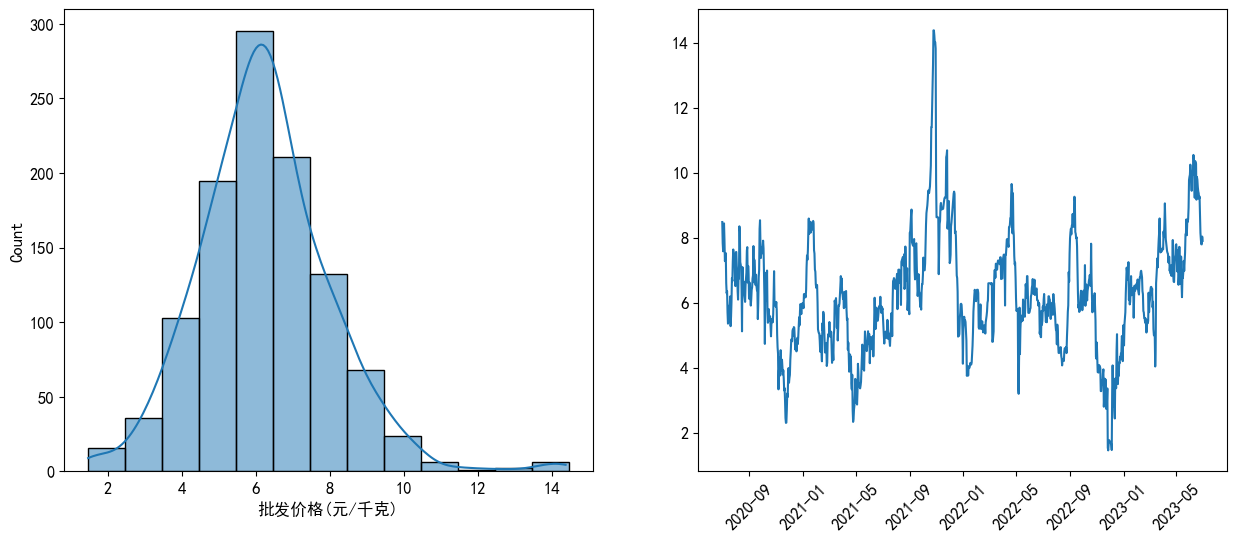

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data=df1, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[0])
ax[1].plot(df1["日期"], df1['批发价格(元/千克)'])
plt.xticks(rotation = 45)
#plt.savefig('绘图文件夹\\正文图10.eps')

C:\Users\jack\AppData\Local\Temp\ipykernel_5404\2571290472.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=90)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


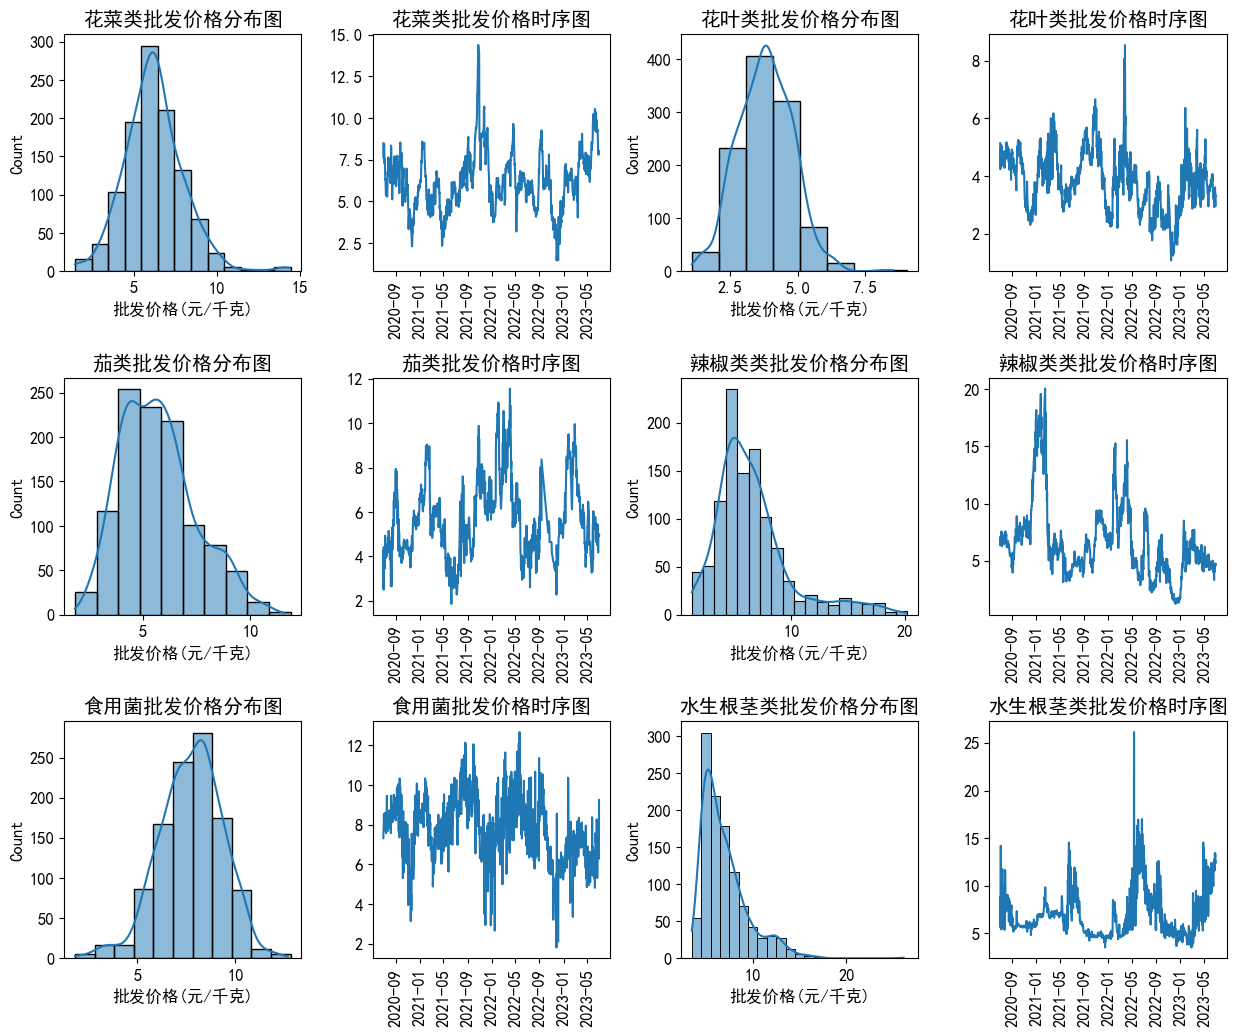

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.45) 

sns.histplot(data=df1, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[0][0])
ax[0][1].plot(df1["日期"], df1['批发价格(元/千克)'])

sns.histplot(data=df2, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[0][2])
ax[0][3].plot(df2["日期"], df2['批发价格(元/千克)'])

sns.histplot(data=df3, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[1][0])
ax[1][1].plot(df3["日期"], df3['批发价格(元/千克)'])

sns.histplot(data=df4, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[1][2])
ax[1][3].plot(df4["日期"], df4['批发价格(元/千克)'])

sns.histplot(data=df5, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[2][0])
ax[2][1].plot(df5["日期"], df5['批发价格(元/千克)'])

sns.histplot(data=df6, x="批发价格(元/千克)", binwidth=1, kde=True, ax=ax[2][2])
ax[2][3].plot(df6["日期"], df6['批发价格(元/千克)'])


ax[0][0].set_title("花菜类批发价格分布图")
ax[0][1].set_title("花菜类批发价格时序图")
ax[0][2].set_title("花叶类批发价格分布图")
ax[0][3].set_title("花叶类批发价格时序图")


ax[1][0].set_title("茄类批发价格分布图")
ax[1][1].set_title("茄类批发价格时序图")
ax[1][2].set_title("辣椒类类批发价格分布图")
ax[1][3].set_title("辣椒类类批发价格时序图")

ax[2][0].set_title("食用菌批发价格分布图")
ax[2][1].set_title("食用菌批发价格时序图")
ax[2][2].set_title("水生根茎类批发价格分布图")
ax[2][3].set_title("水生根茎类批发价格时序图")



# 旋转横坐标标签
for i in range(3):
    for j in range(4):
        if j % 2:
            ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=90)

plt.savefig('绘图文件夹\\附录图4.eps')